<a href="https://colab.research.google.com/github/Rupesh0Poudel/Numerical_Introductory_Seminar/blob/main/Random_Numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


First, we start with John von Neumann's Middle Square digits

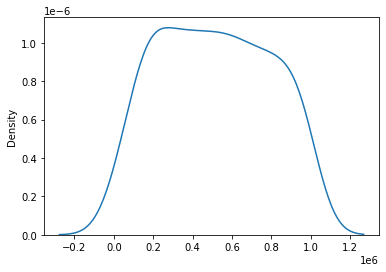

In [142]:
# Middle Square Digits Algorithm

seed = 675248
def random():
    global seed
    #square the number
    s = str(seed ** 2)
    #if  squared number is less than twice the seed length
    while len(s) != 12:
        s = "0" + s
        #add a padding before the number until it reaches twice the seed length
    seed = int(s[3:9])
    return seed
U1 = []
for i in range(0,211):
    U1.append(random())

sns.kdeplot(U1)

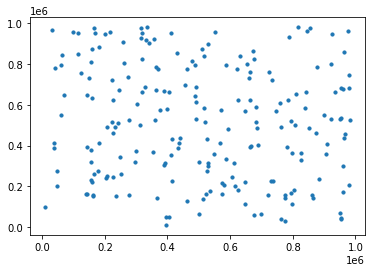

In [143]:
#scatterplot for middle square digits algorithm
plt.scatter(U1[1:210], U1[2:211], s=10 )

In [145]:
#Dynamic Middle Square Digits for four digits. 
seed_number = int(input("Please enter a four-digit number:\n[####] "))
number = seed_number
already_seen = set()
counter = 0

while number not in already_seen:
    counter += 1
    already_seen.add(number)
    number = int(str(number * number).zfill(8)[2:6])  # zfill adds padding of zeroes
    print(f"#{counter}: {number}")

print(f"We began with {seed_number} and"
      f" have repeated ourselves after {counter} steps"
      f" with {number}.")

Please enter a four-digit number:
[####] 2041
#1: 1656
#2: 7423
#3: 1009
#4: 180
#5: 324
#6: 1049
#7: 1004
#8: 80
#9: 64
#10: 40
#11: 16
#12: 2
#13: 0
#14: 0
We began with 2041 and have repeated ourselves after 14 steps with 0.


Now, we generate some uniformly distributed random numbers using LCGs. First, the linear congruential generator that has the form:

$X_{i+1} = (aX_i + c) Mod \: m, \; i = 0,1,2... $

In [7]:
#Linear Congruential Generator
# C++ 11's minstd_rand0 follows modulus of 2^31 -1 , a of 7^5 = 16807 and c=0


def LCG(N,S):
  a = 7**5
  M = 2**31-1

  def fn(S):
    return (a*S) % M

  U2 = []

  for k in range(N):
    S = fn(S)
    U2 += [S/M]

  return U2



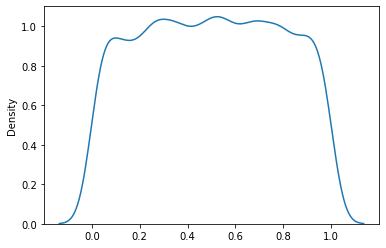

In [8]:

U2 = LCG(10**4, 123)

sns.kdeplot(U2)

#10 million uniform random number generation and kdeplot took 1 minutes 18 seconds 

[0.8126193782373422,
 0.6938900350098918,
 0.20981841125051418,
 0.41803788739165193,
 0.9627733914939562,
 0.3323908389231147,
 0.4928297807894786,
 0.9901257287664924,
 0.04312337843846687,
 0.7746214153126914]

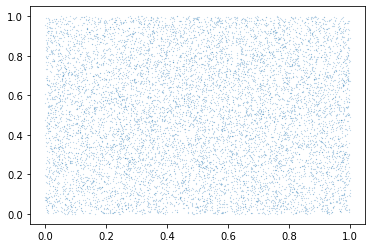

In [148]:
# Scatterplot for the Linear Congruential Generator
plt.scatter(U2[1:9999], U2[2:10000], s=0.01 )
# s sets the size of the dots.thicker dots may fill the space, and not for the reason we want
U2[9990:10000]
#This check is so that we know that the random number is not repating in the end of our generation

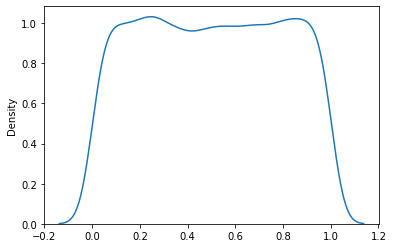

In [9]:
#Lagged Fibonacci Generator For Uniform Random Numbers

# parameter settings
nn   = 18
a    = 1366
b    = 150889
M    = 714025
seed = 123456
n    = 10**4 + 1
yy = []
yy.append(seed)   
i    = 1

# Main computation
while i <= nn:
    yy.append( (a * yy[i - 1] + b) % M)
    i  = i + 1

y = [x / M for x in yy]
i=19

while i <= n + 18:
    zeta = y[i - 12] - y[i - 5]
    if zeta < 0:
        zeta = zeta + 1
    
    y.append(zeta)
    i = i + 1

U3   = y[19:n + 18]
n1  = n - 2
n2  = n - 1

sns.kdeplot(U3) 


10000

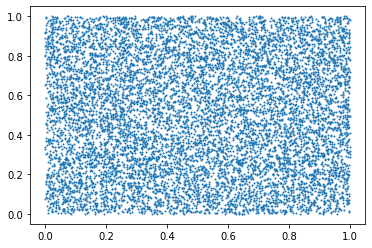

In [10]:
# If we wish to see the first number on the list with respect to second number 
#on the list and so on, scatterplot does that
plt.scatter(U3[1:n1], U3[2:n2], s=1 )
len(U3)

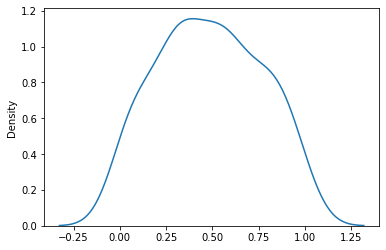

In [34]:
#Random number using the numpy command
U4 = []
np.random.seed(10)
U4 = np.random.uniform(0,1,100)
sns.kdeplot(U4)
# 10 million observation for numpy and kdeplot took 1 minutes 11 seconds


array([0.22860332, 0.01412775, 0.84632447, 0.17367215, 0.35464884,
       0.07388253, 0.32248742, 0.0050953 , 0.3826363 , 0.89368739])

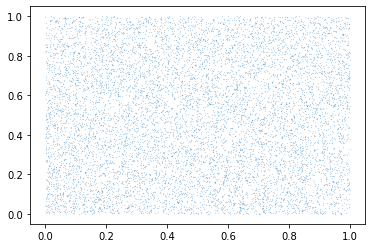

In [12]:
# Scatterplot for numpy default uniform random number generator
plt.scatter(U4[1:10**4-1], U4[2:10**4], s=0.01 )
U4[9990:10000]
# s sets the size of the dots.thicker dots may fill the space, and not for the reason we want

array([[1.        , 0.01334697],
       [0.01334697, 1.        ]])

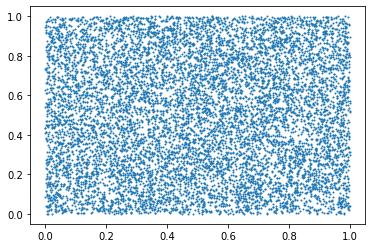

In [13]:
plt.scatter(U2, U3, s = 1)
np.corrcoef(U2,U3)
# to check whether U2 and U3 had generated similar random sequence of numbers

array([[1.        , 0.00164929],
       [0.00164929, 1.        ]])

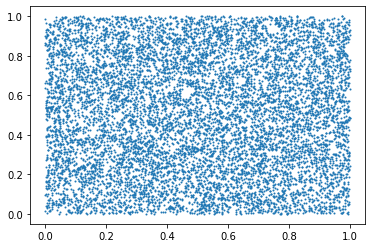

In [164]:
plt.scatter(U2, U4, s = 1)
np.corrcoef(U2,U4)
# to check whether U2 and U4 had generated similar random sequence of numbers

array([[1.       , 0.0089443],
       [0.0089443, 1.       ]])

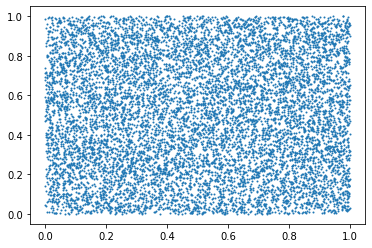

In [165]:
# to check whether U3 and U4 had generated similar random sequence of numbers
plt.scatter(U3, U4, s = 1)
np.corrcoef(U3,U4)

array([[1.        , 0.01334697],
       [0.01334697, 1.        ]])

I have generated random number in 4 different ways: the middle square digits, the linear congruential generator, the lagged fibonacci generator, and default numpy uniform random number generator. 

Now, I stored these random numbers into U1, U2, U3, and U4 respectively.I also drew a scatterplot to confirm that the random sequence of uniform numbers have no apparent relation in between them, that they are unrelated. The pearson correlation coefficient of U2 and U3, U3 and U4, and U2 and U4 were all less than 0.05, with the highest being 0.0133. This shows that there is no linear association with the uniformly distributed sequence of random numbers. 

Thereafter, I will try to convert these uniformly distributed random sequence of numbers into normally distributed random sequence of numbers. The conversion method are as follows:

1.   Box Müller Method
2.   Marsaglia Method
3.   Inverse Method


In addition, I will also generate random sequence of normally distributed numbers using Numpys' default random number generator. 

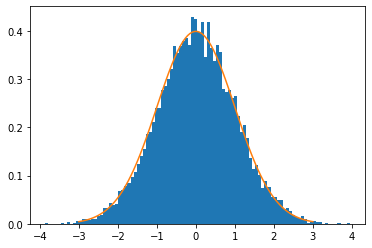

In [14]:
#Box Müller Method _ Youtube channel StatMonteCarlo

import numpy as np
import numpy.random as rd
from scipy import stats
import matplotlib.pyplot as plt

def fcos(theta, E):
  #return [np.cos(theta), np.sin(theta)] * np.sqrt(2*E)
  return np.cos(theta) * np.sqrt(2*E)
  

def BoxMuller(N, mu = 0, sigma = 1 ):
  out = np.zeros(N)
  for j in range(N):
    #theta = rd.uniform(low = 0, high = 2*np.pi, size = 1)
    theta = 2*np.pi * U3[j]
    E = rd.exponential(scale = 1/1, size = 1)
    Y = fcos(theta,E)
    out[j] = mu + Y* sigma
  return out
plt.figure()
Y = BoxMuller(10**4)
plt.hist(Y, bins=100, density=True)
xd=np.linspace(-3,3,100)
plt.plot(xd,stats.norm.pdf(xd))
N1 = Y
#for distribution with mean unequal to 0 and sigma unequal to 1, run the phi module
#and use the following code to plot the outline instead for mean 5 and sigma 2
#plt.plot(xd,phi(xd,5,2))

#characteristics function for arbitrary mu and sigma for normal distribution

#def phi(X, mu, sigma):
#  return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))

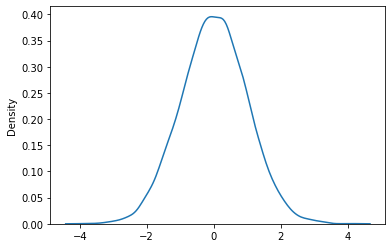

In [169]:
# I will now plot the KDE to see whether the density looks 'normal'
sns.kdeplot(Y)

In [47]:
#marsaglia polar method youtube channel StatMonteCarlo
# This one does not yet use my uniformly distributed sequence of random numbers.
import numpy as np
import numpy.random as rd
from scipy import stats
import matplotlib.pyplot as plt

def f(u1, R_sq):
  return u1 * np.sqrt(-2*np.log(R_sq) / R_sq)

def sim(N):
  out = np.zeros(N)
  for i in range(N):
    R_sq = 2
    while R_sq > 1:
      u1 =  rd.uniform(-1,1) # U2[i] 
      u2 =  rd.uniform(-1,1) #U3[i]  
      R_sq = u1**2 + u2**2
    X = f(u1, R_sq)
    out[i] = X
  return out


#plot
N2 = sim(100)
plt.figure()
plt.hist(X, bins=100, density=True)
xx=np.linspace(-3,3,100)
plt.plot(xx,stats.norm.pdf(xx))
N2 = X

KeyboardInterrupt: ignored

In [46]:
sim(10)

array([ 0.53273108, -0.35013255,  0.1605858 , -0.41084728,  0.22708766,
       -0.64358262, -1.08944297,  0.92107003,  2.64184948,  1.85791002])

In [44]:
U4[]

0.771320643266746

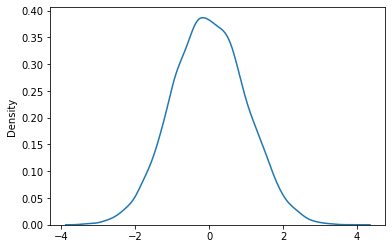

In [182]:
sns.kdeplot(X)


array([[1.       , 0.0139272],
       [0.0139272, 1.       ]])

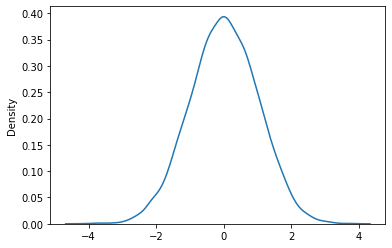

In [16]:
# Inverse Method
# Ndtri : Returns the argument x for which the area under the Gaussian probability density function (integrated from minus infinity to x) is equal to y.

from scipy.special import ndtri

N3 = ndtri(U2)
N4 = ndtri(U3)
sns.kdeplot(N2)
np.corrcoef(N3, N4)

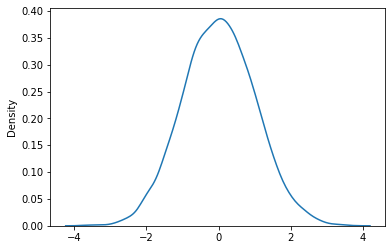

In [17]:
#using the numpy's own random normal number generator
N5 = ndtri(U4)
np.random.seed(10)
N6 = np.random.standard_normal(10**4)
np.corrcoef(N3, N4)
sns.kdeplot(N4)

I now have 6 different sequences of normally distributed random numbers to perform my Monte Carlo Simulation. These sequence of random numbers have been generated through different algorithm and transformation methods listed above.

In [2]:
pip install yfinance

In [4]:
import yfinance as yf

[*********************100%***********************]  1 of 1 completed


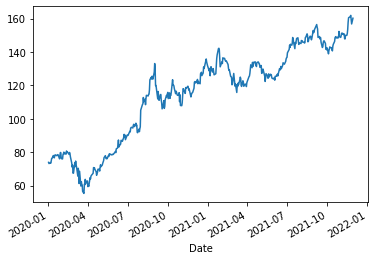

In [19]:
#
df = yf.download("AAPL", start = "2020-1-1", end="2021-11-30")
adj_close= df['Adj Close']
ln_St = np.log(adj_close)
adj_close.plot()

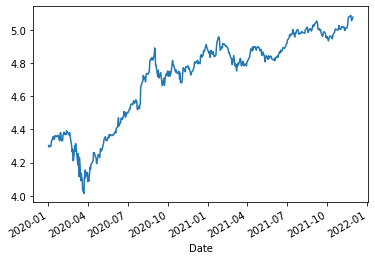

In [20]:
ln_St.plot()

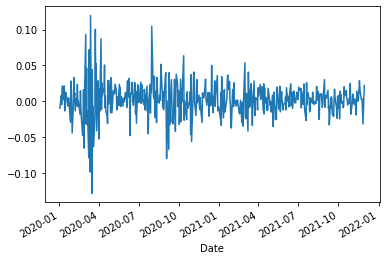

In [28]:
returns = adj_close.pct_change()
returns.plot()

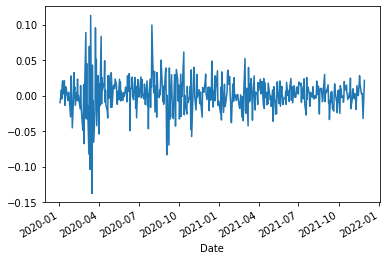

In [48]:
ln_returns = np.log(1+returns)
ln_returns.plot()

In [31]:
simple_returns = returns[1:482]
simple_returns

Date
2020-01-03   -0.009722
2020-01-06    0.007969
2020-01-07   -0.004703
2020-01-08    0.016086
2020-01-09    0.021241
                ...   
2021-11-22    0.002927
2021-11-23    0.002422
2021-11-24    0.003284
2021-11-26   -0.031678
2021-11-29    0.021874
Name: Adj Close, Length: 481, dtype: float64

In [50]:
log_returns = ln_returns[1:482]
log_returns

Date
2020-01-03   -0.009770
2020-01-06    0.007937
2020-01-07   -0.004714
2020-01-08    0.015958
2020-01-09    0.021018
                ...   
2021-11-22    0.002923
2021-11-23    0.002419
2021-11-24    0.003278
2021-11-26   -0.032191
2021-11-29    0.021638
Name: Adj Close, Length: 481, dtype: float64

In [53]:
trials = 10000
num_days = 252
simulation_df = pd.DataFrame()
last_price = adj_close[-1]

In [55]:
ln_last_price = np.log(last_price)
ln_last_price

5.076672725638416

In [58]:
for x in range(trials):
    count = 0
    daily_vol = log_returns.std()
    
    price_series = []
    
    price = ln_last_price * (1 + np.random.normal(0, daily_vol))
    price_series.append(price)
    
    for y in range(num_days):
        if count == 251:
            break
        price = price_series[count] * (1 + np.random.normal(0, daily_vol))
        price_series.append(price)
        count += 1
    
    simulation_df[x] = price_series
 
# code copied from/ inspired by youtube channel "codebliss"

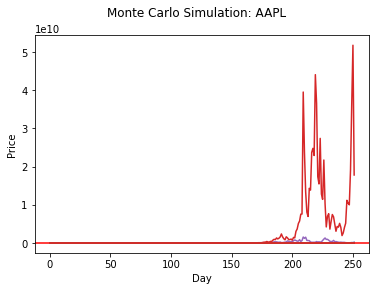

In [59]:
   
fig = plt.figure()
fig.suptitle('Monte Carlo Simulation: AAPL')
plt.plot(simulation_df)
plt.axhline(y = ln_last_price, color = 'r', linestyle = '-')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()